# Module 3 - Heatmap

* [Heatmap](#Heatmap)
* [Correlation Heatmap](#Correlation-Heatmap)

A whole module for that might not be necessary.  
You will do it all the time for data with an average size.

vmin, vmax — set the range of values that serve as the basis for the colormap  
cmap — sets the specific colormap we want to use (check out the library of a wild range of color palettes here)   
center — takes a float to center the colormap; if no cmap specified, will change the colors in the default   colormap; if set to True — it changes all the colors of the colormap to blues  
annot — when set to True, the correlation values become visible on the colored cells  
cbar — when set to False, the colorbar (that serves as a legend) disappears  

**A golden rule** : always clusterize before plotting.

[A very good alternative for heatmap](https://software.broadinstitute.org/morpheus/)
___


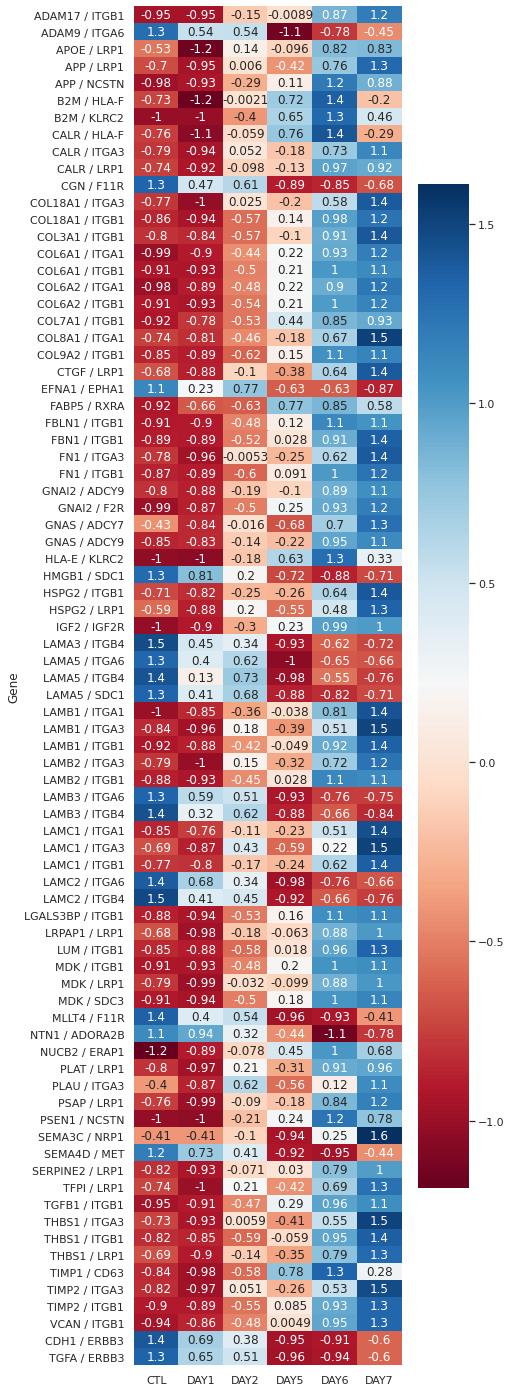

<Figure size 432x288 with 0 Axes>

<Figure size 720x2160 with 0 Axes>

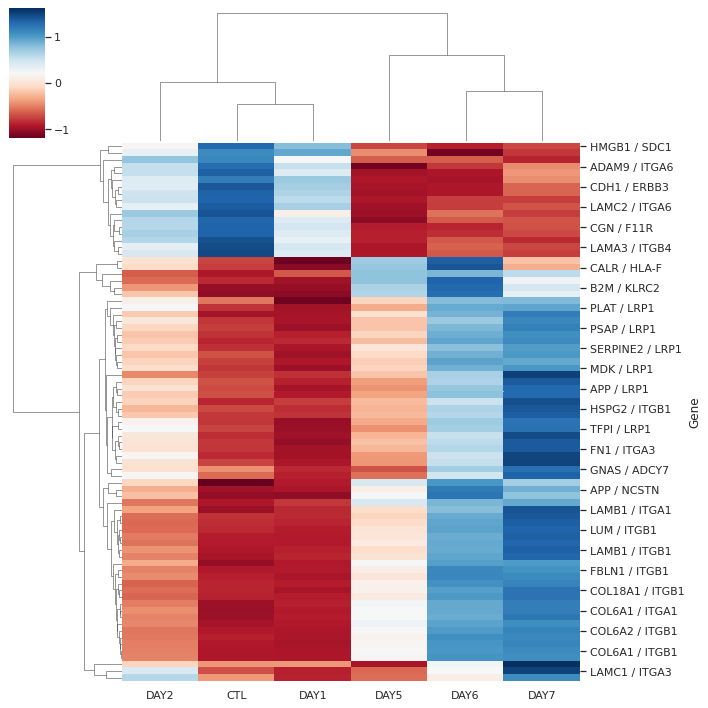

<Figure size 432x288 with 0 Axes>

In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

file = "./data/MatriceGeneScore_DayTreatment.tsv"
data = pd.read_csv(file,sep='\t', index_col='Gene' )
data.head()

plt.figure(figsize=(6,25))

#ax = sns.heatmap(data,linewidth=1)
sns.set_theme()

sns.heatmap(data, annot=True,cmap='RdBu') #linecolor='black'
plt.savefig('./figure/Figure1.png')
plt.show()
plt.clf()

#Plot a matrix dataset as a hierarchically-clustered heatmap.
plt.figure(figsize=(10,30))

sns.clustermap(data,cmap='RdBu') #linecolor='black'
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('./figure/Figure1.png', dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

#center=0,



___

## Correlation-Heatmap
___

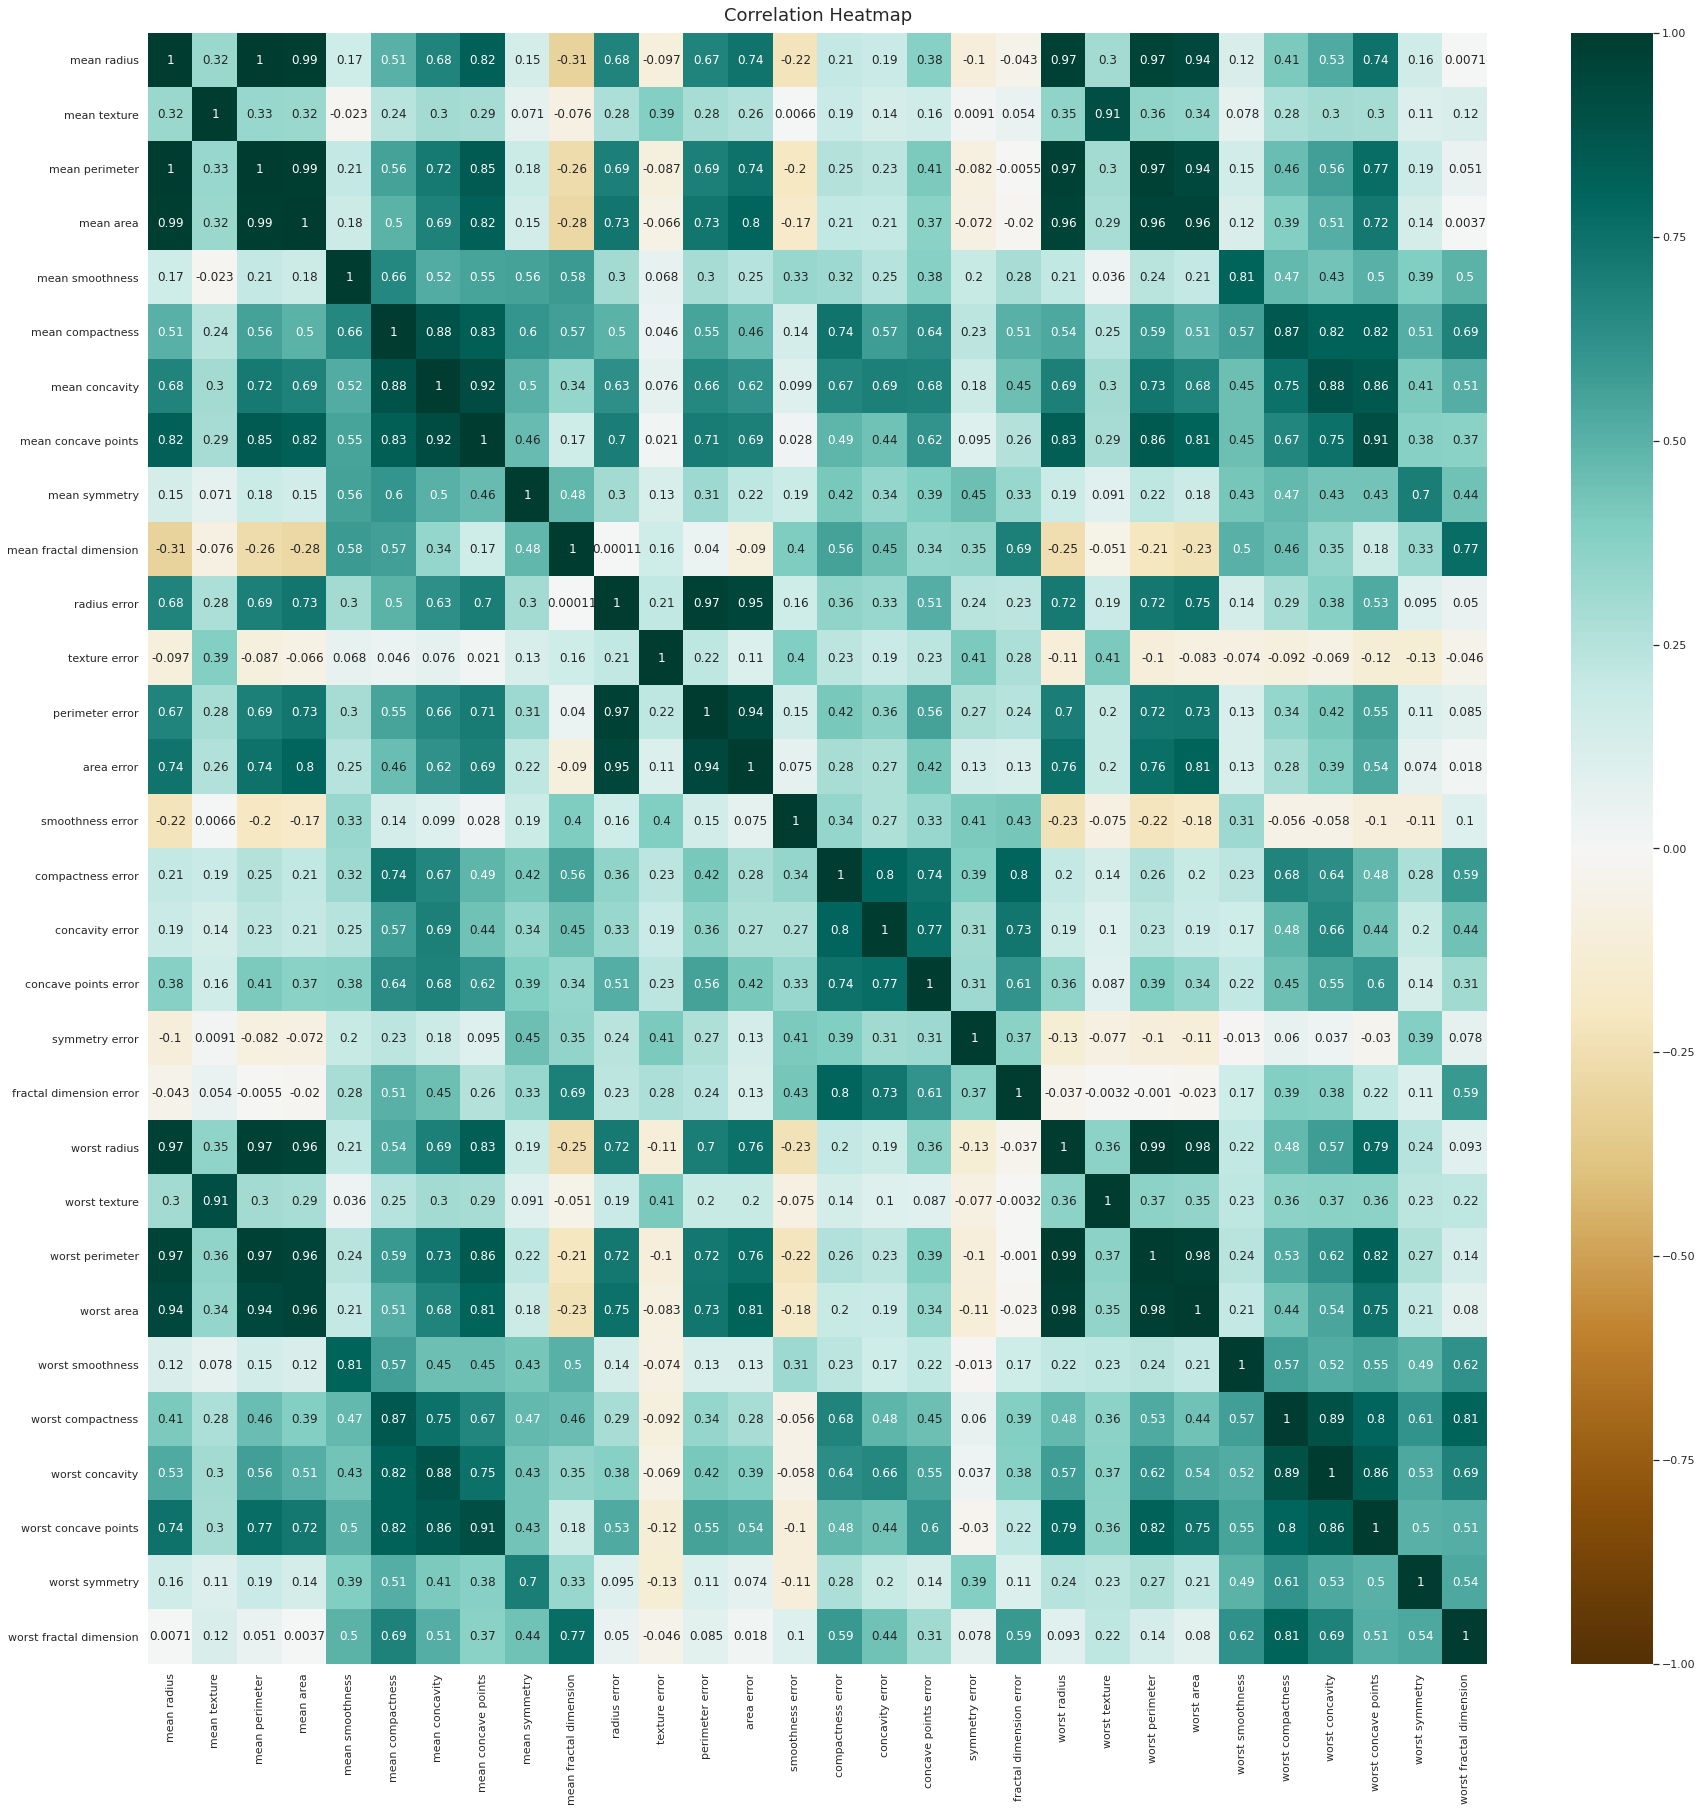

<Figure size 432x288 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

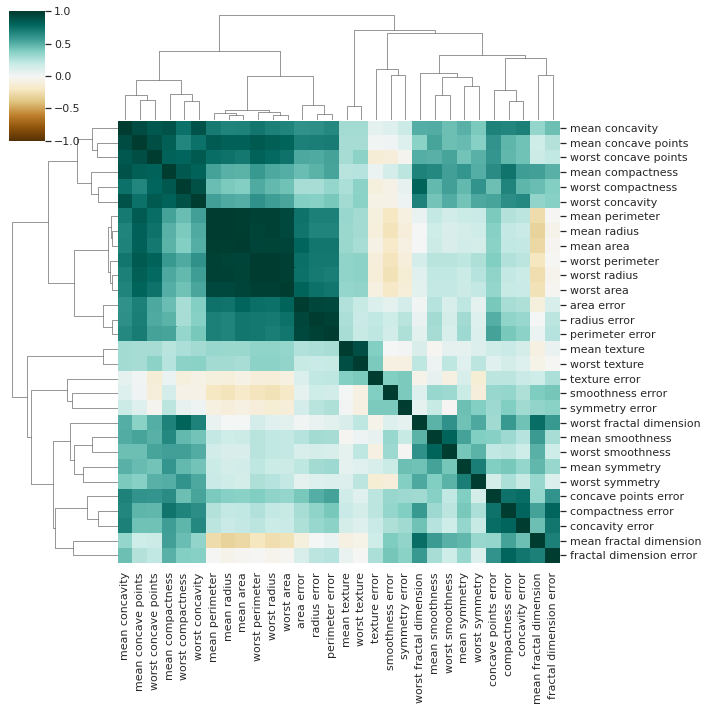

<Figure size 432x288 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

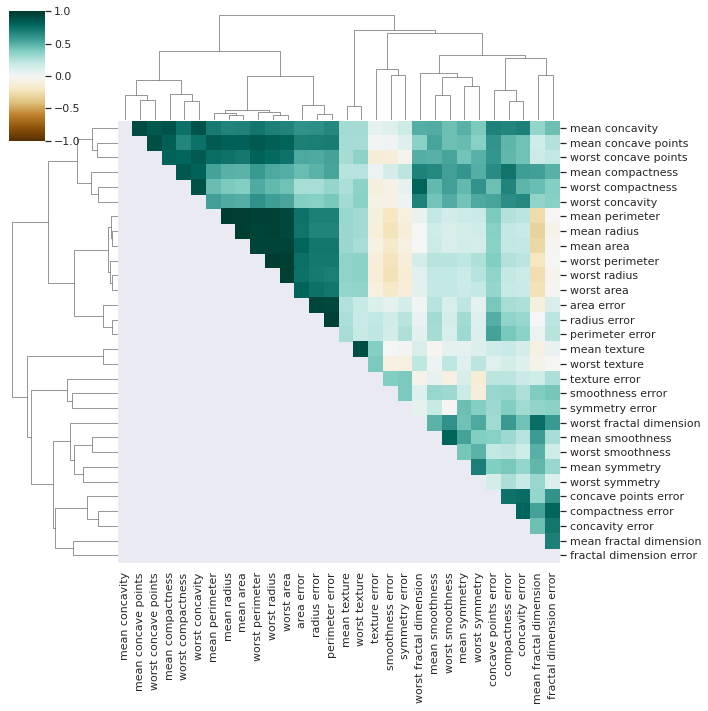

In [42]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() 


# creating dataframe 
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
# checking head of dataframe 
df.head()

plt.figure(figsize=(30, 30))

# This is ridiculous to apply thos without clustering.
heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=True, cmap='BrBG')#YlGnBu BrBG
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()
plt.clf()

plt.figure(figsize=(30, 30))

# This is ridiculous to apply thos without clustering.
clustermap = sns.clustermap(df.corr(), vmin=-1,vmax=1,  cmap='BrBG')#YlGnBu BrBG
plt.show()
plt.clf()

# But what happen if I want to remove some redondancy.

# This is stolen from the depths of the internet.
# np.triu Return a copy of an array with the elements below the k-th diagonal zeroed. 
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# https://stackoverflow.com/questions/67879908/lower-triangle-mask-with-seaborn-clustermap
plt.figure(figsize=(30, 30))

heatmap = sns.clustermap(df.corr(), vmin=-1,vmax=1, cmap='BrBG')#YlGnBu BrBG

mask       = np.tril(np.ones_like(df.corr()))
values     = heatmap.ax_heatmap.collections[0].get_array().reshape(df.corr().shape)
new_values = np.ma.array(values, mask=mask)
heatmap.ax_heatmap.collections[0].set_array(new_values)
plt.show()
